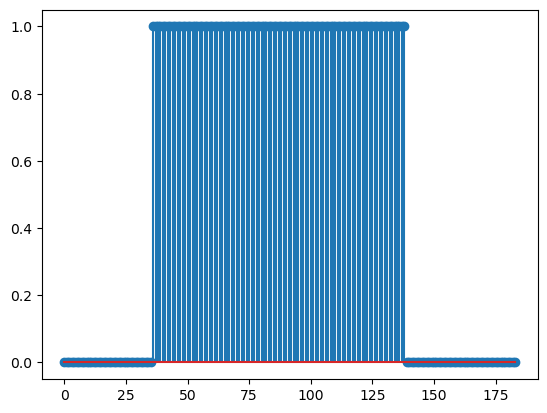

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write

FRAME_SIZE = 2048
threshold = 1800000000

def ece420ProcessFrame(frame):
    isVoiced = 0
    E = 0
    for i in range (len(frame)):
        E = E+(frame[i]*frame[i])
    
    if (E>threshold):
        isVoiced = 1
        #print (E)

    #### YOUR CODE HERE ####

    return isVoiced


################# GIVEN CODE BELOW #####################

Fs, data = read('test_vector.wav')

numFrames = int(len(data) / FRAME_SIZE)
framesVoiced = np.zeros(numFrames)

for i in range(numFrames):
    frame = data[i * FRAME_SIZE : (i + 1) * FRAME_SIZE]
    framesVoiced[i] = ece420ProcessFrame(frame.astype(float))

plt.figure()
plt.stem(framesVoiced)
plt.show()

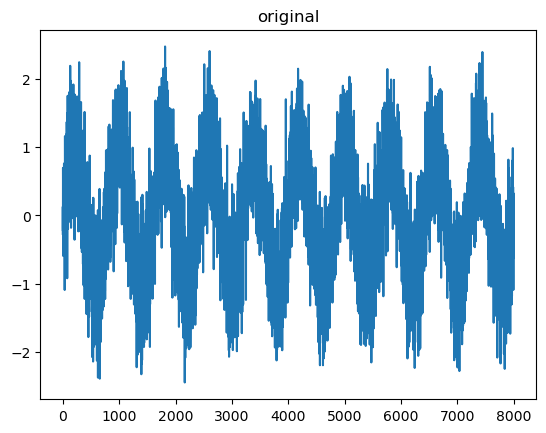

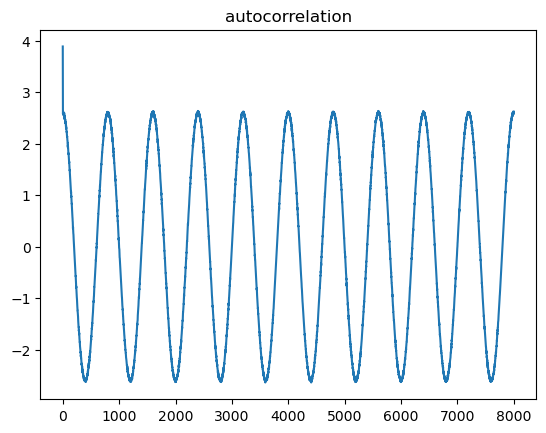

In [3]:
import numpy as np
import matplotlib.pyplot as plt

fs = 8000        # Sampling Rate is 8000
duration = 1     # 1 sec
t = np.linspace(0,duration,duration*fs)
freq = 10        # Tune Frequency is 10 Hz
tune = np.sin(2*np.pi*freq*t)

# Add some Gaussian noise 
tune += np.random.normal(0, 0.5, duration * fs)

plt.figure()
plt.title("original")
plt.plot(tune)


# Start a new figure for your autocorrelation plot 
plt.figure()

# Your code here
def cycle (a,b):
    if (a<0):
        return a+b
    else:
        return a

E = 0
R = []
for i in range (len(frame)):
    E = E+(tune[i]*tune[i])

for j in range (len(tune)):
    Rl = 0
    for k in range (len(tune)):
        itr = cycle (k-j,len(tune))
        Rl += tune[k] * tune[itr]
    R.append(Rl/E)

plt.plot(R)
plt.title('autocorrelation')
# Only call plt.show() at the very end of the script 
plt.show()

In [4]:
#for all autocorrelation the highest response will be at l=0;
#aside from that, the first peak we got is at l=800
#since sampling freq is 8000, we have f = fs/l = 10Hz